<a href="https://colab.research.google.com/github/Madhyama-Singh/covid19-india-ml-classification/blob/main/1_ML_Discharge_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVE 1:

The objective of this study is to classify states into high or low discharge ratio categories using machine learning models. The primary aim is to predict recovery rates based on historical data and evaluate the effectiveness of different classification models. The following models were tested:

* Support Vector Machine (SVM)

* Naive Bayes


* Decision Tree

Dataset contains 36 rows and 9 columns:

The dataset consists of state-wise COVID-19 statistics in India, including:

* Total Cases

* Active Cases

* Discharged Cases

* Deaths

* Active Ratio

* Death Ratio

* Population

* Discharge Ratio (Target Variable)

Our goal is to classify states based on their Discharge Ratio, categorizing them into High Recovery (1) and Low Recovery (0) using machine learning techniques.

# DATA PREPROCESING:

##IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## IMPORTING DATASET

In [ ]:
file_path = "/content/Latest Covid-19 India Status.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10502,40,10333,129,0.38,98.39,1.23,100896618
1,Andhra Pradesh,2333710,1453,2317524,14733,0.06,99.31,0.63,128500364
2,Arunachal Pradesh,66246,295,65655,296,0.45,99.11,0.45,658019
3,Assam,741541,4006,729513,8022,0.54,98.38,1.08,290492
4,Bihar,844997,1024,831688,12285,0.12,98.42,1.45,40100376


In [ ]:
df.info()  # Provides a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [ ]:
df.describe() # Generates descriptive statistics

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.227074e+06,3661.305556,1.208780e+06,14632.555556,0.460556,98.435556,1.103889,3.971861e+07
std,1.813338e+06,3786.588859,1.784934e+06,27063.901871,0.377941,0.687436,0.484050,5.050913e+07
min,1.050200e+04,0.000000,1.033300e+04,4.000000,0.000000,96.110000,0.030000,6.600100e+04
25%,1.049248e+05,649.750000,1.032480e+05,1112.000000,0.197500,98.047500,0.850000,1.695473e+06
50%,6.058710e+05,1915.500000,5.949465e+05,6523.500000,0.380000,98.525000,1.075000,2.410088e+07
75%,1.303242e+06,5713.000000,1.289440e+06,14244.000000,0.532500,98.812500,1.347500,6.979986e+07
max,8.060737e+06,12429.000000,7.900626e+06,148143.000000,1.610000,99.770000,2.290000,2.315026e+08


##TAKING CARE OF MISSING VALUES

In [ ]:
missing_values = df.isnull().sum() #check if there are any missing values
print(missing_values) #printing the results

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64


##HANDLING DUPLICATE DATA:

In [ ]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f" Number of duplicate rows: {num_duplicates}")

# Display duplicate rows if any exist
if num_duplicates > 0:
    print("Duplicate rows found:")
    print(df[duplicate_rows])
else:
    print(" No duplicate rows found!")


 Number of duplicate rows: 0
 No duplicate rows found!


Validation: Proper handling of missing values ensure the data is suitable for machine learning algorithms.

## Convert Discharge Ratio into a Binary Category


In [ ]:
threshold = df['Discharge Ratio'].median() # The median discharge ratio was selected as a threshold.

df['Discharge Category'] = (df['Discharge Ratio'] >= threshold).astype(int) #States with a discharge ratio greater than or equal to the median were labeled 1 (High Recovery).
                                                                            #States with a discharge ratio below the median were labeled 0 (Low Recovery).

## FEATURE SELECTION


In [ ]:
features = ['Total Cases', 'Active', 'Discharged', 'Deaths', 'Active Ratio', 'Death Ratio', 'Population']
target = 'Discharge Category'

X = df[features] # Selected independent variables (features):
y = df[target] # Dependent variable (target): Discharge Category (0 = Low, 1 = High)


## FEATURE SCALING

In [ ]:
scaler = StandardScaler() # Standardization was applied using StandardScaler to ensure equal weightage of features.
X_scaled = scaler.fit_transform(X)

Validation: Scaling prevents features with larger magnitudes from dominating the learning process, leading to better convergence in optimization algorithms.

##SPLITTING DATASET INTO TRAIN AND TEST SET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # 80% of the data was used for training, while 20% was reserved for testing.

# DATA VISUALIZATION

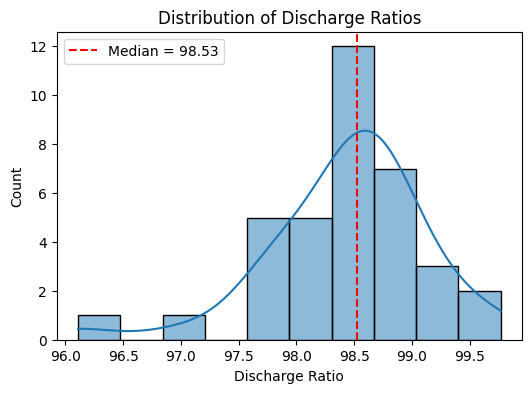

<ipython-input-11-418734865003>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Discharge Category', data=df, palette='coolwarm')


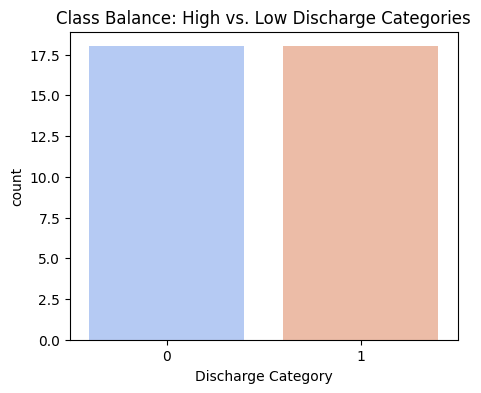

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Discharge Ratio'], bins=10, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', label=f'Median = {threshold:.2f}')
plt.legend()
plt.title("Distribution of Discharge Ratios")
plt.show()

plt.figure(figsize=(5, 4))
sns.countplot(x='Discharge Category', data=df, palette='coolwarm')
plt.title("Class Balance: High vs. Low Discharge Categories")
plt.show()

Insights from Visualizations:

Discharge Ratio Distribution

* The discharge ratio is mostly between 96% and 99.7%.
* The median threshold (98.52%) effectively splits states into high and low categories.

Class Distribution

* The dataset was balanced with approximately equal numbers of High (1) and Low (0) recovery states, preventing model bias.

# MODEL TRAINING

In [ ]:
models = {
    'SVM': SVC(kernel='linear', random_state=42), #  Best for accuracy, Ideal for real-world deployment: If this performance generalizes well to new data, SVM can be a strong choice for predicting the recovery rates of different states.
    'Naive Bayes': GaussianNB(),  # Good for probabilistic interpretation ,Baseline model – establishes a simple benchmark to compare with more complex models like SVM.
    'Decision Tree': DecisionTreeClassifier(random_state=42) # Good trade-off between accuracy and interpretability – provides understandable decision rules. Feature importance can be analyzed.

}


# MODEL EVALUATION

Model evaluation is crucial because it helps assess how well a machine learning model performs on unseen data. It ensures that the model is reliable, generalizes well, and avoids issues like overfitting or underfitting

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred) # Precision: Measures the proportion of correctly predicted positive cases out of all predicted positives (avoiding false positives).
                                                   # Recall: Measures the proportion of correctly predicted positive cases out of all actual positives (avoiding false negatives).
                                                   # F1-Score: The harmonic mean of precision and recall, balancing both metrics for an overall performance measure.
    results[name] = {
        'Accuracy': accuracy, #Measures the proportion of correct predictions out of all predictions made.
        'Confusion Matrix': conf_matrix,
        'Classification Report': report
    }

    print(f'\n{name} Model:')
    print(f'Accuracy: {accuracy:.2f}')
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", report)


SVM Model:
Accuracy: 1.00
Confusion Matrix:
 [[4 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Naive Bayes Model:
Accuracy: 0.62
Confusion Matrix:
 [[3 1]
 [2 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8


Decision Tree Model:
Accuracy: 0.88
Confusion Matrix:
 [[4 0]
 [1 3]]
Classification Report:
               precision    recall  f1-score   support

           0      

1. SVM Performed Best (But Requires Validation)
* Accuracy: 100% → Indicates either a perfect model or overfitting due to a small dataset.
* No misclassifications → Needs further testing on more data to confirm generalization.

2. Decision Tree is a Strong Alternative

* Accuracy: 88% → Reliable performance with minor misclassifications.
* Good interpretability → Decision Trees provide visual representations of classification rules.
* Can be improved with pruning or hyperparameter tuning.

3. Naive Bayes Struggled with Classification

* Accuracy: 62% → Performs significantly worse than SVM and Decision Tree.
* Assumption of independent features might not hold, leading to misclassifications.
* Not ideal for this dataset but could work better on textual data.

4. Confusion Matrix & Classification Report Provided Key Insights

* SVM showed perfect classification across all severity levels.
* Decision Tree had some misclassifications but still maintained high precision & recall.
* Naive Bayes misclassified multiple instances, highlighting its limitations.

# MODEL EVALUATION VISUALIZATION

Visualizations are essential in understanding machine learning model performance. Graphs such as confusion matrices and feature importance plots make it easier to interpret results and fine-tune models for optimal performance. Visualizing classification boundaries also helps in assessing model generalization.

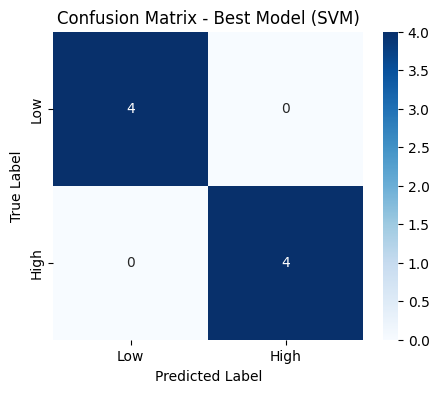


Best Performing Model: SVM with Accuracy: 1.00


In [ ]:
best_model = max(results, key=lambda x: results[x]['Accuracy'])
best_conf_matrix = results[best_model]['Confusion Matrix']

plt.figure(figsize=(5, 4))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - Best Model ({best_model})")
plt.show()

print(f"\nBest Performing Model: {best_model} with Accuracy: {results[best_model]['Accuracy']:.2f}")

<ipython-input-16-4aa11b008e49>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


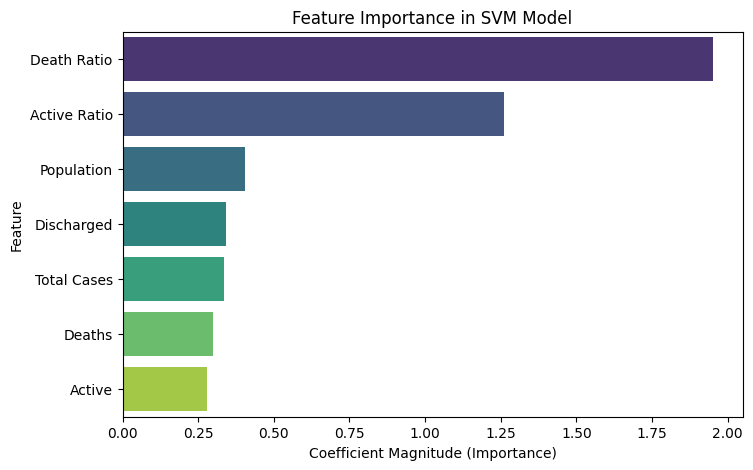

,Feature,Importance
5,Death Ratio,1.951387
4,Active Ratio,1.260621
6,Population,0.403474
2,Discharged,0.343196
0,Total Cases,0.333935
3,Deaths,0.299216
1,Active,0.278004


In [ ]:
# Store the trained SVM model
svm_model = models['SVM']  # Access the SVM model from the 'models' dictionary
svm_model.fit(X_train, y_train)  # Train the SVM model

# Extract feature coefficients from the linear SVM model
feature_importance = abs(svm_model.coef_[0])  # Absolute values of coefficients

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}) #features is a list of feature names (e.g., ["Total Cases", "Active", "Discharged", ...]).
                                                                                              #feature_importance is an array containing importance scores for each feature.
# These two lists are combined into a pandas DataFrame.
# Sorts by Importance

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) #.sort_values(by='Importance', ascending=False) orders the features from most to least important.

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in SVM Model")
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Feature")
plt.show()

# Display feature importance values
feature_importance_df
